In [1]:
import cv2

In [3]:
from tensorflow import keras 

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing import image

In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\off1c\OneDrive\Desktop\Datsets\forest_fire\Training and Validation",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_dataset = test.flow_from_directory(r"C:\Users\off1c\OneDrive\Desktop\Datsets\forest_fire\Testing",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [17]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [65]:
model = keras.Sequential([
    keras.layers.Input(shape=(150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 444ms/step - accuracy: 0.9707 - loss: 0.0873 - val_accuracy: 0.8824 - val_loss: 0.2183
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 440ms/step - accuracy: 0.9763 - loss: 0.0691 - val_accuracy: 0.9118 - val_loss: 0.2090
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 455ms/step - accuracy: 0.9813 - loss: 0.0543 - val_accuracy: 0.9706 - val_loss: 0.0890
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 449ms/step - accuracy: 0.9840 - loss: 0.0583 - val_accuracy: 0.9265 - val_loss: 0.1833
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 450ms/step - accuracy: 0.9881 - loss: 0.0451 - val_accuracy: 0.8676 - val_loss: 0.4165


In [39]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


In [41]:
predictions

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [43]:
print(len(predictions))

68


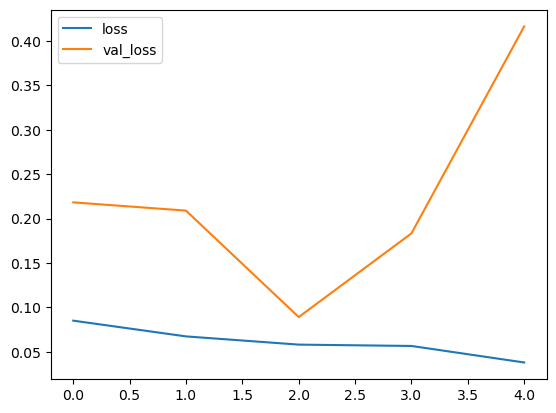

In [49]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

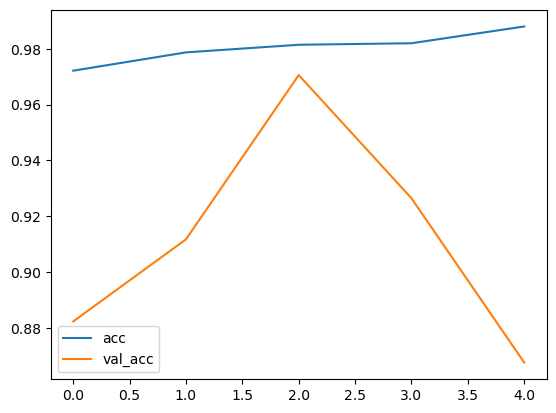

In [51]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [53]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size = (150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("No Fire", fontsize=30)
    elif val==0:
        plt.xlabel("Fire", fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
[[0.]]


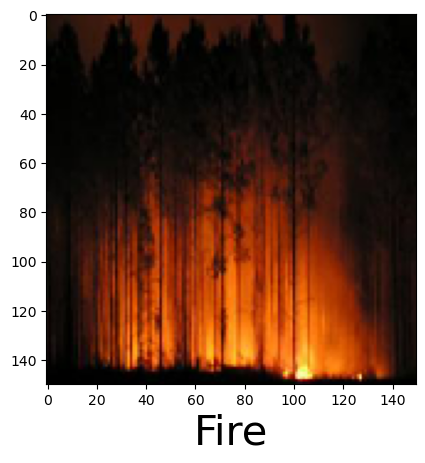

In [55]:
predictImage(r"C:\Users\off1c\OneDrive\Desktop\Datsets\forest_fire\Testing\fire\abc176.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[1.]]


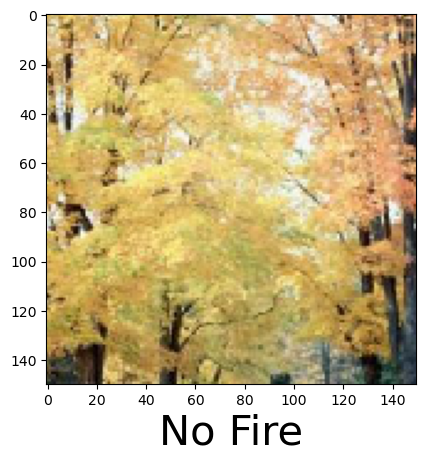

In [59]:
predictImage(r"C:\Users\off1c\OneDrive\Desktop\Datsets\forest_fire\Training and Validation\nofire\abc200.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[1.]]


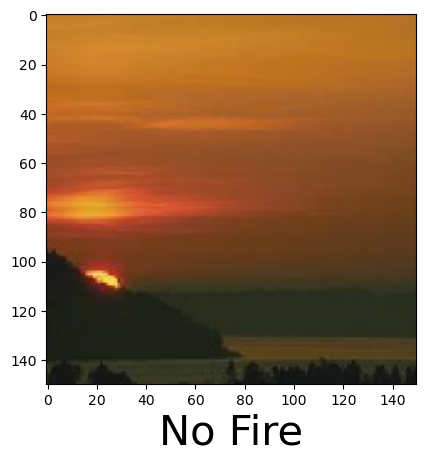

In [57]:
predictImage(r"C:\Users\off1c\OneDrive\Desktop\Datsets\forest_fire\Training and Validation\nofire\abc191.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[0.]]


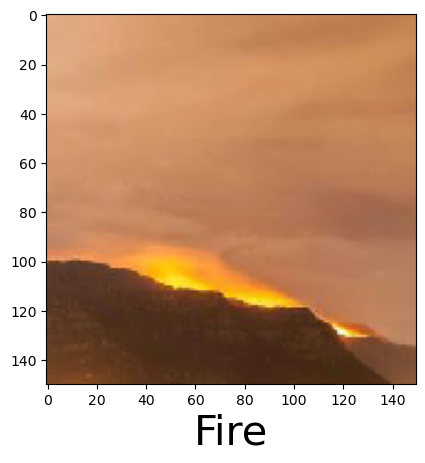

In [63]:
predictImage(r"C:\Users\off1c\OneDrive\Desktop\Datsets\forest_fire\Testing\fire\abc185.jpg")